# Arabc Characters MNIST 
A [Kaggle Project](https://www.kaggle.com/mloey1/ahcd1) provided by [Benha University](http://bu.edu.eg/staff/mloey)

Project By: [Uzair](https://github.com/Uzair05)

## Using CSV Datasets

### Download and move data

In [ ]:
#!pip install --upgrade kaggle
!kaggle datasets download -d mloey1/ahcd1

In [ ]:
import os 
import zipfile

try:
    os.mkdir("./data/")
except Exception as err:
    print(f"Error in creating data/:\t{err}")


localzip = "./ahcd1.zip"
zip_ref = zipfile.ZipFile(localzip, 'r')
try:
    zip_ref.extractall('data/')
except Exception as err:
    print(f"Erorr in zip extraction:\t{err}")
finally:
    zip_ref.close()

### Handle Data
Create test, train and validation data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#import random as rand

In [2]:
data = pd.read_csv("./data/csvTestImages 3360x1024.csv")
label = pd.read_csv("./data/csvTestLabel 3360x1.csv")

In [3]:
x_train = data.to_numpy()
x_shape, _ = x_train.shape
x_train = x_train.reshape(x_shape, 32, 32)
y_train = label.to_numpy()
y_shape, _ = y_train.shape
y_train = y_train.reshape(y_shape,)

In [4]:
for i in range(x_shape):
    x_train[i,:,:] = np.rot90(x_train[i,:,:], axes=(1,0))

x_train = x_train.reshape(x_shape, 32, 32, 1)
x_train = x_train/255.0

In [5]:
y_train = y_train - 1

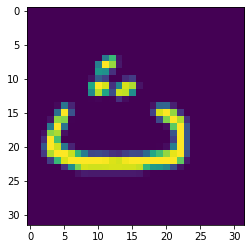

In [6]:
plt.imshow(x_train[6,:,:])

### Create Model

In [7]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        accuracy = 0.7 # Percentage Accuracy.
        if(logs.get('accuracy') != None) and (logs.get('accuracy') >= accuracy): # Experiment with changing this value
          print(f"\nReached {accuracy*100}% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = myCallback()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu, padding='same', input_shape=(32,32, 1)),
    tf.keras.layers.Conv2D(12, (3,3), activation=tf.nn.leaky_relu),
    tf.keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(28, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 12)        120       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 12)        1308      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 12)        1308      
_________________________________________________________________
flatten (Flatten)            (None, 9408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                602176    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4

### Train Model

In [9]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=15, 
    verbose=1, 
    callbacks=[callbacks],
)

Epoch 1/15
105/105 [==============================] - 6s 48ms/step - loss: 3.1841 - accuracy: 0.0804
Epoch 2/15
105/105 [==============================] - 5s 47ms/step - loss: 2.7327 - accuracy: 0.1718
Epoch 3/15
105/105 [==============================] - 6s 58ms/step - loss: 2.3272 - accuracy: 0.2742
Epoch 4/15
105/105 [==============================] - 5s 47ms/step - loss: 1.9998 - accuracy: 0.3465
Epoch 5/15
105/105 [==============================] - 5s 47ms/step - loss: 1.7466 - accuracy: 0.4189
Epoch 6/15
105/105 [==============================] - 5s 51ms/step - loss: 1.5780 - accuracy: 0.4665
Epoch 7/15
105/105 [==============================] - 5s 47ms/step - loss: 1.3808 - accuracy: 0.5344
Epoch 8/15
105/105 [==============================] - 5s 51ms/step - loss: 1.2850 - accuracy: 0.5549
Epoch 9/15
105/105 [==============================] - 6s 55ms/step - loss: 1.1384 - accuracy: 0.6133
Epoch 10/15
105/105 [==============================] - 5s 45ms/step - loss: 1.0744 - accura

### Evaluate Model

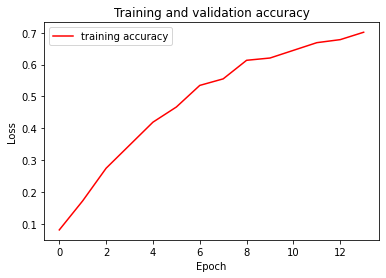

<Figure size 432x288 with 0 Axes>

In [27]:
loss, accuracy = history.history['loss'], history.history['accuracy']
plt.plot(range(14), accuracy, 'r', label='training accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

### Save Model

In [28]:
tf.keras.models.save_model(model, filepath="./my_model/OwnCNN_70p.h5", overwrite=True)

## Using Images Datasets

### Handle Data

#### Bash Command - Linux


* bash script to sort labelled images into directories.  
    * Use directories in imageneration

#### Python Command - Windows

### CNN Transfer Learning
